In [63]:
import torch
import pandas

In [64]:
data = pandas.read_csv("data.csv", index_col=None)
# data.rename(columns ={'Unnamed: 0': 'id'}, inplace = True)


In [65]:
data

,Unnamed: 0.1,Unnamed: 0,id,frame_id,timestamp_ms,agent_type,x,y,vx,vy,psi_rad,length,width,velocity,ang_vel
0,0,0,0,0,0,car,-14.351,4.636,0.025,-0.012,-0.434,4.0,1.8,0.027731,0.00
1,1,1,0,1,100,car,-14.349,4.634,0.003,-0.001,-0.434,4.0,1.8,0.003162,0.00
2,2,2,0,2,200,car,-14.349,4.634,-0.013,0.006,-0.434,4.0,1.8,0.014318,0.00
3,3,3,0,3,300,car,-14.350,4.635,-0.020,0.009,-0.434,4.0,1.8,0.021932,0.00
4,4,4,0,4,400,car,-14.352,4.636,-0.015,0.007,-0.434,4.0,1.8,0.016553,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67560,67560,67560,4536,8992,899200,car,-20.550,-2.083,2.769,-1.803,-0.577,4.0,1.8,3.304265,-0.03
67561,67561,67561,4536,8993,899300,car,-20.276,-2.268,2.712,-1.780,-0.581,4.0,1.8,3.243970,-0.04
67562,67562,67562,4536,8994,899400,car,-20.008,-2.451,2.665,-1.763,-0.584,4.0,1.8,3.195371,-0.03
67563,67563,67563,4536,8995,899500,car,-19.745,-2.633,2.634,-1.755,-0.588,4.0,1.8,3.165119,-0.04


In [75]:
vector_map = dict()
for i in data.id.unique():
    temp_data = data[data['id']==i]
    vec_list = list()
    for iter,row in temp_data.iterrows():
        vec = [float(row.x),float(row.y),float(row.timestamp_ms)]
        vec_list.append(vec)
    vector_map[i] = torch.tensor(vec_list).to("cuda")


In [76]:
vector_map[0]

tensor([[-1.4351e+01,  4.6360e+00,  0.0000e+00],
        [-1.4349e+01,  4.6340e+00,  1.0000e+02],
        [-1.4349e+01,  4.6340e+00,  2.0000e+02],
        ...,
        [ 1.3949e+01,  1.3790e+01,  3.9000e+04],
        [ 1.4428e+01,  1.4365e+01,  3.9100e+04],
        [ 1.4881e+01,  1.4920e+01,  3.9200e+04]], device='cuda:0')

In [88]:
from math import sin,cos
angular_transform = torch.zeros(3,3).to("cuda")
linear_transform = torch.tensor([-0.08,-0.05])
phi = 0.04

In [89]:
angular_transform[0][0] = cos(phi)
angular_transform[0][1] = sin(phi)
angular_transform[1][0] = -1*sin(phi)
angular_transform[1][1] = cos(phi)
angular_transform[2][2] = 1

In [90]:
angular_transform

tensor([[ 0.9992,  0.0400,  0.0000],
        [-0.0400,  0.9992,  0.0000],
        [ 0.0000,  0.0000,  1.0000]], device='cuda:0')

In [87]:
t = torch.tensor([-8.244000000000028,2.6680000000000064,1]).to("cuda")
t = t-
k = t@angular_transform

In [80]:



linear_transform = torch.tensor([1.0,2.0,0]).to("cuda")
linear_transform.to("cuda")

result_map = dict()
for i in vector_map:
    # vector_map[i] = vector_map[i] - linear_transform
    vector_map[i] = torch.bmm(vector_map[i].unsqueeze(0),angular_transform.unsqueeze(0)).squeeze() - linear_transform


In [81]:
vector_map[0][0] 

tensor([-15.4621,  -6.2769,   0.0000], device='cuda:0')

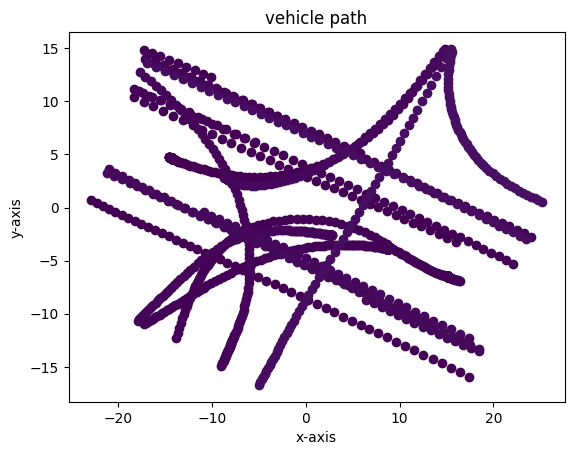

In [15]:
import matplotlib.pyplot as plt
import pandas
import matplotlib.colors as mcolors
import matplotlib.cm as cm

color_map = cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=len(data.id.unique()))

data = pandas.read_csv("data.csv")
fig, ax = plt.subplots()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('vehicle path')
plt.ion()  # Turn on interactive mode for dynamic updating

for i in data.id.unique()[:20]:
    data_temp = data[data['id']==i]
    color = color_map(norm(i))

    # for _,row in data_temp.iterrows():
    ax.scatter(data_temp.x.to_list(),data_temp.y.to_list(),c=[color])
plt.ioff()
plt.show()

